In [1]:
import sys
import os
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
sys.path.append("../gotmtool")
from gotmtool import *

In [2]:
dataroot1 = '../Forcing_entire_cruise2'
filename1 = '1D_SD_ERA5_input_2.mat'
dataroot2 = '../case2'
filename2 = 'unfilter.mat'

In [3]:
dat_filtered   = sio.loadmat(os.path.join(dataroot1, filename1))
dat_unfiltered = sio.loadmat(os.path.join(dataroot2, filename2))

In [4]:
era5_met = dat_filtered['ERA5_met'][0,0]
sd_met = dat_filtered['SD_met'][0,0]
keys = [v[0] for v in era5_met.dtype.descr]
print(keys)

['time', 'qlat', 'qsens', 'lw', 'sw', 'precip', 'tau', 'U', 'Udir']


In [5]:
sd_unfiltered = dat_unfiltered['SD_unfilter'][0,0]
keys = [v[0] for v in sd_unfiltered.dtype.descr]
print(keys)

['time', 'U_wind', 'Udir', 'sst', 'tair', 'tau', 'SHF', 'LHF']


In [6]:
year = 2019
doy = era5_met['time']
dttime_filtered = [(pd.to_datetime(year*1000 + np.floor(d), format='%Y%j') 
             + pd.to_timedelta((d-np.floor(d))*86400, unit='S'))[0] for d in doy]
# dttime_filtered

In [7]:
year = 2019
doy = sd_unfiltered['time']
dttime_unfiltered = [(pd.to_datetime(year*1000 + np.floor(d), format='%Y%j') 
             + pd.to_timedelta((d-np.floor(d))*86400, unit='S'))[0] for d in doy]
# dttime_unfiltered

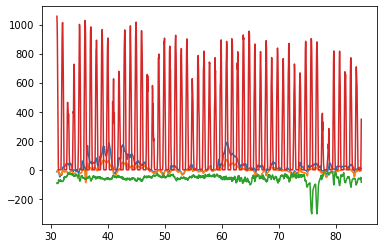

In [8]:
plt.plot(era5_met['time'], era5_met['qlat'])
plt.plot(era5_met['time'], era5_met['qsens'])
plt.plot(era5_met['time'], era5_met['lw'])
plt.plot(era5_met['time'], era5_met['sw'])

(38.0, 42.0)

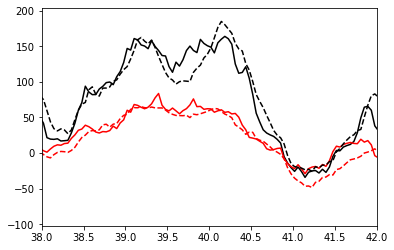

In [9]:
plt.plot(sd_met['time'], sd_met['qlat'], '-k')
plt.plot(sd_met['time'], sd_met['qsens'], '-r')
plt.plot(era5_met['time'], era5_met['qlat'], '--k')
plt.plot(era5_met['time'], era5_met['qsens'], '--r')
plt.xlim([38,42])

In [10]:
sw = era5_met['sw'].squeeze()
dat_dump_ts(dttime_filtered, [sw], os.path.join(dataroot2, 'swr_era5.dat'), skip_value=np.nan)

In [11]:
lw_filtered = era5_met['lw'].squeeze()
lw_unfiltered = np.interp(sd_unfiltered['time'].squeeze(), era5_met['time'].squeeze(), lw_filtered)
lw_unfiltered.shape

(95493,)

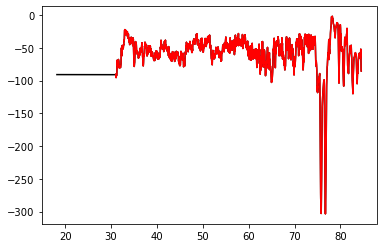

In [12]:
plt.plot(sd_unfiltered['time'], lw_unfiltered, '-k')
plt.plot(sd_met['time'], lw_filtered, '-r')

(38.0, 42.0)

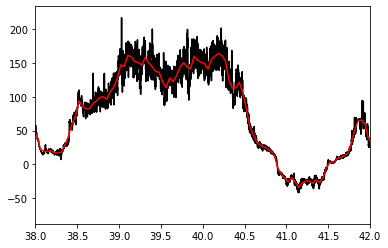

In [13]:
plt.plot(sd_unfiltered['time'], sd_unfiltered['LHF'], '-k')
plt.plot(sd_met['time'], sd_met['qlat'], '-r')
plt.xlim([38,42])

In [14]:
hf_filtered = sd_met['qlat'].squeeze() + sd_met['qsens'].squeeze() + lw_filtered
hf_unfiltered = sd_unfiltered['LHF'].squeeze() + sd_unfiltered['SHF'].squeeze() + lw_unfiltered

(38.0, 42.0)

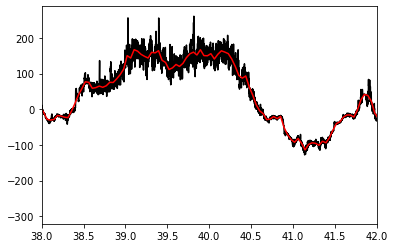

In [15]:
plt.plot(sd_unfiltered['time'], hf_unfiltered, '-k')
plt.plot(sd_met['time'], hf_filtered, '-r')
plt.xlim([38,42])

In [16]:
dat_dump_ts(dttime_unfiltered, [hf_unfiltered], os.path.join(dataroot2, 'hf_unfiltered.dat'), skip_value=np.nan)
dat_dump_ts(dttime_filtered, [hf_filtered], os.path.join(dataroot2, 'hf_filtered.dat'), skip_value=np.nan)

(38.0, 42.0)

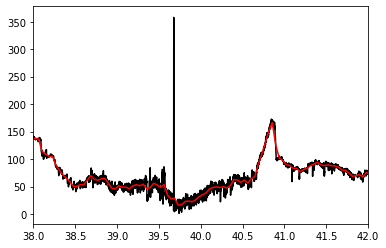

In [17]:
plt.plot(sd_unfiltered['time'], sd_unfiltered['Udir'].squeeze(), '-k')
plt.plot(sd_met['time'].squeeze(), sd_met['Udir'].squeeze(), '-r')
plt.xlim([38,42])

(38.0, 42.0)

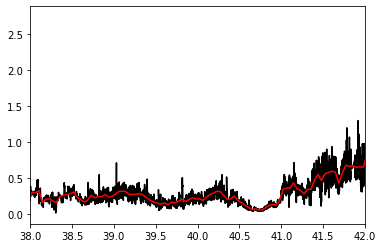

In [18]:
plt.plot(sd_unfiltered['time'], sd_unfiltered['tau'].squeeze(), '-k')
plt.plot(sd_met['time'].squeeze(), sd_met['tau'].squeeze(), '-r')
plt.xlim([38,42])

In [19]:
taux_filtered = (sd_met['tau'] * np.sin(np.deg2rad(sd_met['Udir']))).squeeze()
tauy_filtered = (sd_met['tau'] * np.cos(np.deg2rad(sd_met['Udir']))).squeeze()

In [20]:
taux_unfiltered = (sd_unfiltered['tau'] * np.sin(np.deg2rad(sd_unfiltered['Udir']))).squeeze()
tauy_unfiltered = (sd_unfiltered['tau'] * np.cos(np.deg2rad(sd_unfiltered['Udir']))).squeeze()

(38.0, 42.0)

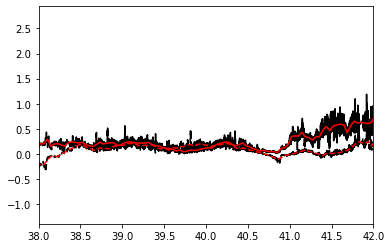

In [21]:
plt.plot(sd_unfiltered['time'].squeeze(), taux_unfiltered, '-k')
plt.plot(sd_unfiltered['time'].squeeze(), tauy_unfiltered, '--k')
plt.plot(sd_met['time'].squeeze(), taux_filtered , '-r')
plt.plot(sd_met['time'].squeeze(), tauy_filtered , '--r')
plt.xlim([38,42])

In [22]:
dat_dump_ts(dttime_unfiltered, [taux_unfiltered, tauy_unfiltered],
            os.path.join(dataroot2, 'tau_unfiltered.dat'), skip_value=np.nan)
dat_dump_ts(dttime_filtered, [taux_filtered, tauy_filtered],
            os.path.join(dataroot2, 'tau_filtered.dat'), skip_value=np.nan)